### https://github.com/zzzsssy/mid_term_project

#### URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/

### Introduction
The wine quality dataset originated with the work of Paulo Cortez, who has made it available for download on his website. Dr. Cortez donated the dataset to the UC Irvine Machine Learning Repository, and it has subsequently been uploaded to kaggle multiple times. 

### Explanation how to improve
The programming done by 장송운 when running the data using RandomForestClassifier (RFC) and DecisionTreeClassifier (DTC) directly, the results shown as 0.671875 for RFC and 0.596875 for DTC. Herewith, I try to improve the accuracy result by scaling the features, putting more iteration for RandomForestClassifier (RFC) and also try using different algorithm which is LinearRegression and DNN.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import math

In [3]:
df=pd.read_csv('C:/Users/02445/Downloads/archivefinalproject/WineQT.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


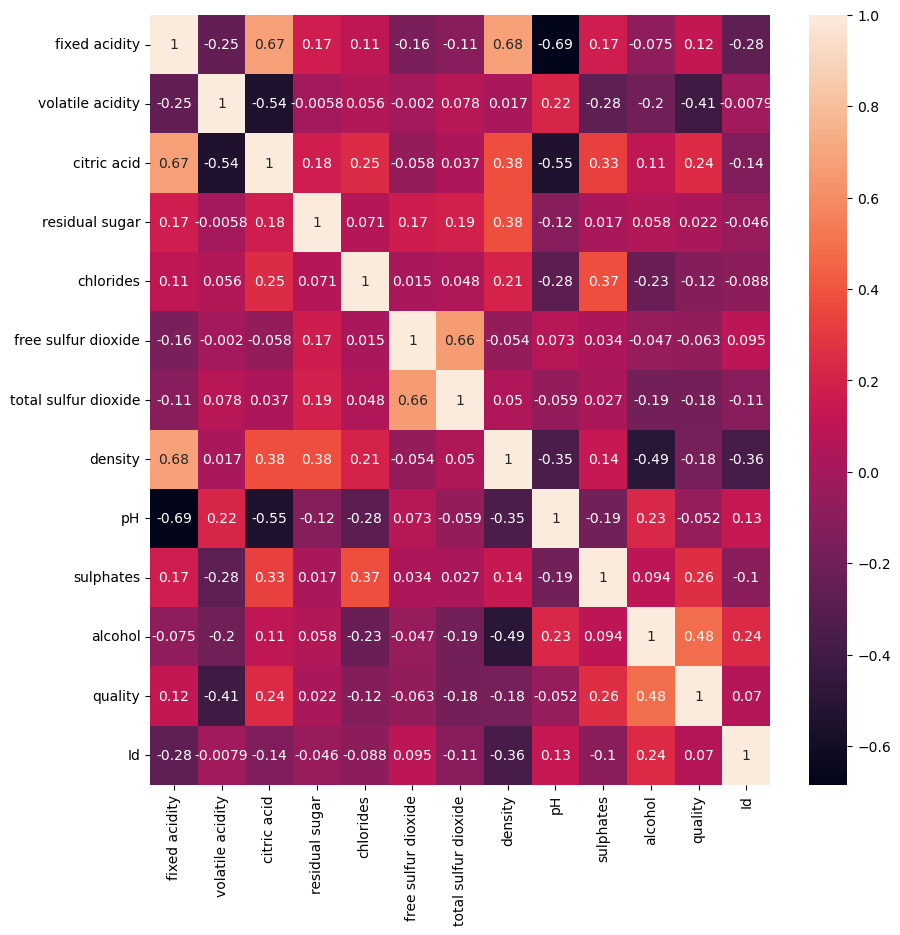

In [6]:
# correlation = df.corr
# ax =
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)

plt.show()

In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df.shape

(1143, 13)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
df['quality'] = df.quality.apply(lambda x: 1 if x>=6 else 0 )
df['quality'].value_counts()

quality
1    621
0    522
Name: count, dtype: int64

In [13]:
df.drop(['Id'], axis = 1)
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=4)
print("X_train",X_train.shape )
print("y_train",y_train.shape )
print("X_test",X_test.shape )
print("y_test",y_test.shape )

X_train (822, 12)
y_train (822,)
X_test (321, 12)
y_test (321,)


In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Training 

In [16]:
# Create the linear regression models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Fit the models to the train data
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)

#prediction
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)
elasticnet_pred = elasticnet.predict(X_test_scaled)

## Model Score/ Accuracy
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

print("Linear Regression: MSE - ", lr_mse, ", RMSE:",math.sqrt(lr_mse), "r2:", lr_r2 )
print("Ridge Regression: MSE - ", ridge_mse, ", RMSE:",math.sqrt(ridge_mse) )
print("Lasso Regression: MSE - ", lasso_mse, ", RMSE:",math.sqrt(lasso_mse) )
print("ElasticNet Regression: MSE - ", elasticnet_mse, ", RMSE:",math.sqrt(elasticnet_mse) )

Linear Regression: MSE -  0.18582900736325106 , RMSE: 0.4310788876334018 r2: 0.24774075792736883
Ridge Regression: MSE -  0.1857396557722532 , RMSE: 0.4309752380035925
Lasso Regression: MSE -  0.24727085829592296 , RMSE: 0.49726336914750013
ElasticNet Regression: MSE -  0.24727085829592296 , RMSE: 0.49726336914750013


In [17]:
# Logistic Regression

from sklearn import linear_model



logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [18]:
logr_pred = logr.predict(X_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logr_accuracy = accuracy_score(y_test, logr_pred)
logr_precision = precision_score(y_test, logr_pred)
logr_recall = recall_score(y_test, logr_pred)
logr_f1 = f1_score(y_test, logr_pred)

In [20]:
print(f"Accuracy: {logr_accuracy:.2f}")
print(f"Precision: {logr_precision:.2f}")
print(f"Recall: {logr_recall:.2f}")
print(f"F1-Score: {logr_f1:.2f}")
# print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.74
Precision: 0.76
Recall: 0.79
F1-Score: 0.77


In [21]:
# from sklearn.model_selection import GridSearchCV

# # Define a grid of hyperparameters to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'solver': ['liblinear', 'lbfgs'],
#     'max_iter': [100, 500, 1000],
# }

# # Create a grid search object
# grid_search = GridSearchCV(linear_model.LogisticRegression(), param_grid, cv=5)

# # Perform the grid search on the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train a logistic regression model with the best hyperparameters
# best_model = linear_model.LogisticRegression(**best_params)
# best_model.fit(X_train_scaled, y_train)
# logr_pred = best_model.predict(X_test_scaled)


# logr_accuracy = accuracy_score(y_test, logr_pred)
# logr_precision = precision_score(y_test, logr_pred)
# logr_recall = recall_score(y_test, logr_pred)
# logr_f1 = f1_score(y_test, logr_pred)


# print(f"Accuracy: {logr_accuracy:.2f}")
# print(f"Precision: {logr_precision:.2f}")
# print(f"Recall: {logr_recall:.2f}")
# print(f"F1-Score: {logr_f1:.2f}")

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [23]:
rf_pred = rf_model.predict(X_test_scaled)

In [24]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")

Accuracy: 0.77
Precision: 0.79
Recall: 0.80
F1-Score: 0.79


In [25]:
df['quality'].value_counts()

quality
1    621
0    522
Name: count, dtype: int64

##### I used 80% of entire dataset as Train set and the rest as Validation set. 

In [26]:
df_train, df_val = train_test_split(df, test_size=0.2)

In [27]:
X_train = df_train.drop(['quality', 'Id'], axis=1)
X_val = df_val.drop(['quality', 'Id'], axis=1)

y_train = df_train['quality']
y_val = df_val['quality']

#### I used RobustScaler for preprocessing.

In [29]:
# Scaling
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
# To Tensor
X_train_ts = torch.FloatTensor(X_train)
X_val_ts = torch.FloatTensor(X_val)

y_train_ts = torch.LongTensor(y_train.values)
y_val_ts = torch.LongTensor(y_val.values)

In [31]:
# Hyperparameter
LR = 1e-3
N_EPOCH = 500
DROP_PROB = 0.3

#### I built DNN model with 2 hidden layers and used ReLU as activation function, Xavier initialization, and Dropout to prevent overfitting. 

In [32]:
# Model
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        
        self.fc1 = nn.Linear(X_train_ts.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 11)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=DROP_PROB)
        
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        output = self.fc4(x)
        return output

In [33]:
model = DNN()

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

In [34]:
for epoch in range(1, N_EPOCH+1):
    model.train()
    out = model(X_train_ts)
    loss = loss_fn(out, y_train_ts)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = (torch.argmax(out, dim=1) == y_train_ts).float().mean().item()
    
    model.eval()
    with torch.no_grad():
        out_val = model(X_val_ts)
        loss_val = loss_fn(out_val, y_val_ts)
        acc_val = (torch.argmax(out_val, dim=1) == y_val_ts).float().mean().item()
    
    if epoch % 20 == 0:
        print('Epoch : {:3d} / {}, Loss : {:.4f}, Accuracy : {:.2f} %, Val Loss : {:.4f}, Val Accuracy : {:.2f} %'.format(
            epoch, N_EPOCH, loss.item(), acc*100, loss_val.item(), acc_val*100))

Epoch :  20 / 500, Loss : 1.2698, Accuracy : 59.08 %, Val Loss : 1.0854, Val Accuracy : 71.18 %
Epoch :  40 / 500, Loss : 0.8007, Accuracy : 61.38 %, Val Loss : 0.5947, Val Accuracy : 72.93 %
Epoch :  60 / 500, Loss : 0.6495, Accuracy : 67.29 %, Val Loss : 0.5356, Val Accuracy : 75.11 %
Epoch :  80 / 500, Loss : 0.6327, Accuracy : 68.38 %, Val Loss : 0.5238, Val Accuracy : 76.42 %
Epoch : 100 / 500, Loss : 0.5645, Accuracy : 73.85 %, Val Loss : 0.5154, Val Accuracy : 76.86 %
Epoch : 120 / 500, Loss : 0.5669, Accuracy : 71.99 %, Val Loss : 0.5110, Val Accuracy : 77.29 %
Epoch : 140 / 500, Loss : 0.5437, Accuracy : 73.74 %, Val Loss : 0.5060, Val Accuracy : 77.73 %
Epoch : 160 / 500, Loss : 0.5466, Accuracy : 74.18 %, Val Loss : 0.5065, Val Accuracy : 77.73 %
Epoch : 180 / 500, Loss : 0.5152, Accuracy : 77.13 %, Val Loss : 0.5058, Val Accuracy : 78.17 %
Epoch : 200 / 500, Loss : 0.5028, Accuracy : 76.48 %, Val Loss : 0.5070, Val Accuracy : 77.73 %
Epoch : 220 / 500, Loss : 0.4956, Accura

#### So, from 3 algorithm, the accuracy is improve compared to previous approach by 장송운

In [36]:
print(f" 장송운 accuracy scores for RFC=0.671875 and DTC=0.596875")
print(f" this accuracy scores for RFC={rf_accuracy:.5f}")
print(f" LogisticRegresstion={logr_accuracy:.5f}")
print(f" DNN RobustScaler={acc_val}")
      

 장송운 accuracy scores for RFC=0.671875 and DTC=0.596875
 this accuracy scores for RFC=0.76947
 LogisticRegresstion=0.74455
 DNN RobustScaler=0.7641921639442444
